# No Supervised ML

### Iris flower dataset

---



<img src="https://accounts.iebschool.com/uploads/profile/48f8fd4ccb38eb54c8c8b45656a8d32ce661054e.png" style="float:rigth" width="150">

*Guillermo Calvo Altesor*

 ---

In [ ]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

### Get Data

In [ ]:
# get data and show some records

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,sepal length,sepal width,petal length,petal width,target
63,6.1,2.9,4.7,1.4,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor
22,4.6,3.6,1.0,0.2,Iris-setosa
132,6.4,2.8,5.6,2.2,Iris-virginica


In [ ]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

print("\n Caracteristicas \n")
print(X.sample(5))
print("\n Target \n")
print(y.sample(5))


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
17            5.1          3.5           1.4          0.3
14            5.8          4.0           1.2          0.2
112           6.8          3.0           5.5          2.1
6             4.6          3.4           1.4          0.3
131           7.9          3.8           6.4          2.0

 Target 

94     Iris-versicolor
70     Iris-versicolor
122     Iris-virginica
62     Iris-versicolor
136     Iris-virginica
Name: target, dtype: object


### Visualize Data

In [ ]:

data["target"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

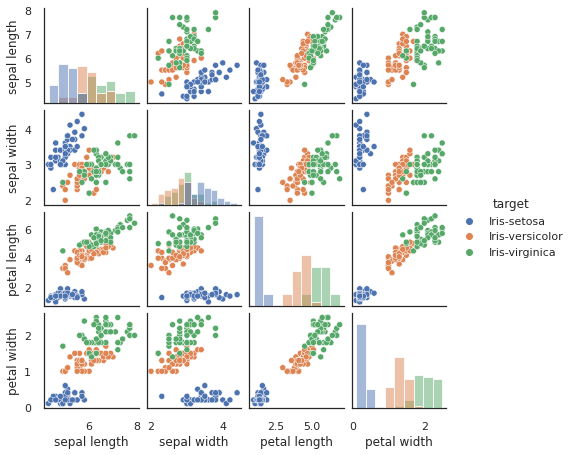

In [ ]:


sns.pairplot(data, hue="target", diag_kind="hist", size=1.6);

Versicolor and Virginica are very similar, it will be very difficult to generate a clustering algorithm that can separate them, but let's try!

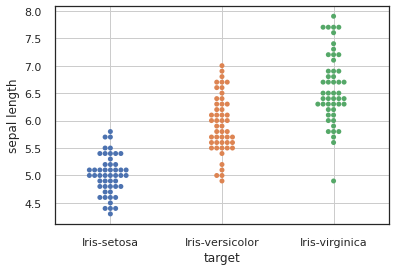

In [ ]:
sns.swarmplot(x="target", y="sepal length", data=data)
plt.grid()


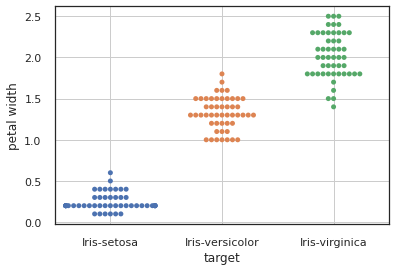

In [ ]:
sns.swarmplot(x="target", y="petal width", data=data)
plt.grid()

### Feature Scaling

The data is unbalanced, for example Sepal Lenght is about 4 times larger than Petal Width, so I recommend scaling the values. otherwise, the largest features will dominate the others in the grouping, etc.

In [ ]:

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

X_scaled_array = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


### Silhouette score & Elbow Method

a value close to +1 indicates that the sample is far from neighboring clusters. A value of 0 indicates that the sample is at or very close to the decision boundary between two neighboring clusters, and negative values indicate that those samples may have been assigned to the wrong cluster.

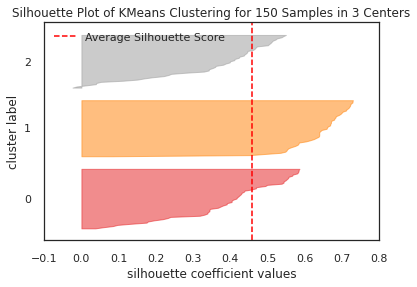

In [ ]:
# Instantiate the clustering model and visualizer 
#pip install yellowbrick

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 3
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data


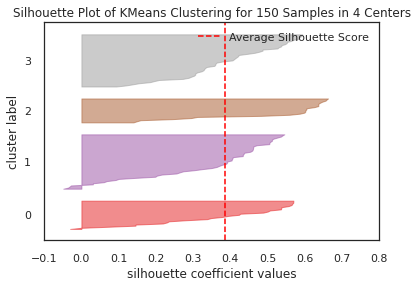

In [ ]:
# Instantiate the clustering model and visualizer 
#pip install yellowbrick


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 4
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data


It can be seen that with 3 clusters an average silhouette score of 0.47 is obtained and with 4 clusters a score of approximately 0.39 is obtained, therefore it is recommended to train a clustering model with 3 clusters.

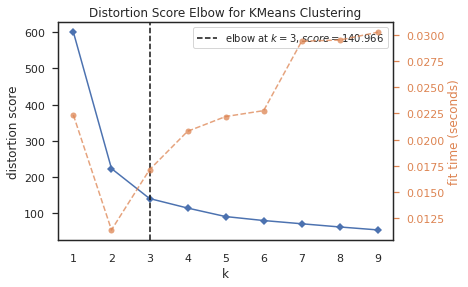

In [ ]:
#from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

seed = 0

km = KMeans(init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

We observe by the ELBOW method that we have to use a K=3, that is, 3 clusters.

### K-Means

Let's try clustering the data in 4D and see if you can reproduce the actual clusters. That is, let's imagine that we don't have the species labels in this data and we want to divide the flowers into species, we could set an arbitrary number of groups and try to divide them into similar groups. We know that there are 3 species, so let's find 3 species and see if the predictions for each point match the label in and, on the other hand, we know that by the method of silhouettes and elbow, the recommended number of clusters is 3.

In [ ]:

from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=3, random_state=0) ##
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)

print("\n Caracteristicas \n")
print(X_scaled)

print("\n\n\n Clusters \n")
print(y_cluster_kmeans)


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]



 Clusters 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2

### Principal Component Analysis (PCA)


If you have many features, it may be useful to reduce some features, to avoid the curse of dimensionality (ie, needing exponentially more data to make accurate predictions as the number of features grows).
You can do this with principal component analysis (PCA), which remaps the data to a new (smaller) coordinate system that tries to account for as much information as possible. you can *also* use PCA to visualize the data by reducing the # features to 2 dimensions and making a scatterplot.

In this case I recommend using PCA to be able to visualize the data, we have already trained the K-means model and we have the clusters identified, now we transform the characteristics from 4D to 2D. to only visualize them in a graph, and to be able to observe the CLUSTERS.

In [ ]:

from sklearn.decomposition import PCA

ndimensions = 2
 
pca = PCA(ndimensions)  
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)


X_pca = pd.DataFrame(X_pca_array, columns=['principal component 1','principal component 2']) 


print(X_pca.sample(20))
explained_variance = pca.explained_variance_ratio_
print("\n\n explained_variance")
print(explained_variance)

     principal component 1  principal component 2
106               0.358374              -1.560095
141               1.903117               0.686025
126               1.171905              -0.318897
55                0.384458              -0.591062
87                1.035878              -1.392466
127               1.019781               0.065543
38               -2.435952              -0.882169
135               2.800949               0.844748
35               -2.211120              -0.184338
25               -1.957024              -0.607893
117               2.437378               2.556757
119               1.253981              -1.717584
37               -2.188676              -0.448629
76                1.254222              -0.082620
89                0.275425              -1.329816
139               1.853552               0.672423
7                -2.233842               0.247614
88                0.067068              -0.212621
70                0.738256               0.402470


We have new 2D coordinates for each data point.
At this point, if you don't have labeled data, you can add the k-means cluster IDs to this table and make a color scatterplot. We actually have labels for the data points, but let's imagine we don't, and use the predicted labels to see what the predictions look like.



In [ ]:

finalDf = pd.concat([X_pca, data[['target']]], axis = 1)
finalDf.head()

finalDf['ClusterKmeans'] = y_cluster_kmeans
finalDf.sample(10)

,principal component 1,principal component 2,target,ClusterKmeans
119,1.253981,-1.717584,Iris-virginica,0
81,0.014118,-1.573392,Iris-versicolor,0
59,0.004968,-1.029401,Iris-versicolor,0
117,2.437378,2.556757,Iris-virginica,2
95,0.089053,-0.174909,Iris-versicolor,0
72,1.227988,-0.940915,Iris-versicolor,0
35,-2.211120,-0.184338,Iris-setosa,1
77,1.358240,0.328820,Iris-versicolor,2
63,0.717165,-0.185434,Iris-versicolor,0
19,-2.339949,1.158033,Iris-setosa,1


### Scatter Plot (TARGET)

In this graph we will visualize all the points, where the axes are the main components obtained from applying PCA to the scaled dataset, and each point will be displayed painted with colors associated with the label or target, since we start from a labeled dataset.

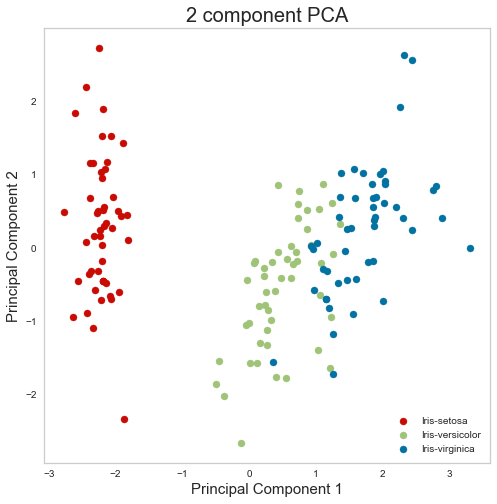

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Scatter Plot (CLUSTERS)

In this graph we will visualize all the points, where the axes are the main components obtained from applying PCA to the scaled dataset, and each point will be displayed painted with colors associated with the CLUSTER obtained after applying K-MEANS, as can be compared with the data labeled, the clusters are VERY SIMILAR.

Such a mechanism can be used to label flowers, when we do not have the label beforehand, it can even be used to generate more specific classifications.

As we made clear from the beginning, the division between Versicolor and Virginica is very fine, and in both charts it is difficult to find a clear division.

The actual split, based on the prelabeled data, is by a VERTICAL line through the middle of the data set, whereas according to K-means, the split is by a horizontal line through the data.

In these cases, reality differs a bit from what a mathematical algorithm establishes. Surely to obtain a better division it is necessary to have more characteristics.

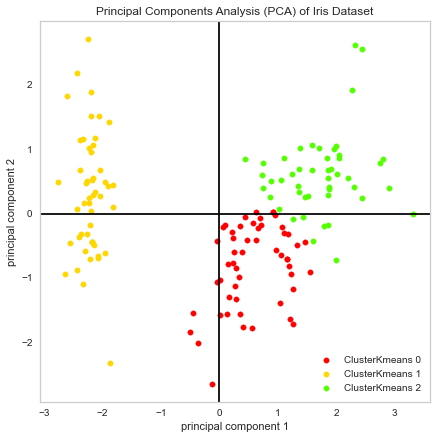

In [ ]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");
    
# plot the clusters each datapoint was assigned to
plotData(finalDf, 'ClusterKmeans')
    

## Conclusion

*   La combinación de visualizaciones y tablas numéricas es de vital importancia, no sólo para la comprensión de los datos, sino también a la hora de decidir qué clustering elegir.
*   PCA nos ha ayudado en esta visualización y en la normalización de los datos.
*   Ambas medidas, Elbow y Silueta nos han indicado que el número de Clústers recomendado es de 3.
*   Segurmente, para resolver problemas reales, necesitaremos de más comprobaciones, perspectivas y diferentes algoritmos de clústering si queremos tener mejores soluciones.